# Classify Clothes from Fashion MNIST Dataset
The objective of the project is - to use Fashion-MNIST data set to identify (predict) different fashion products(articles) from the given images using Machine Learning.

##### About the Datatset
Fashion-MNIST is a dataset of Zalando's article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import gzip
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Defining Fucntions

def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

# Loading the data

In [3]:
filePath_train_set = '/kavyapan/datasets/project/fashion-mnist/train-images-idx3-ubyte.gz'
filePath_train_label = '/kavyapan/datasets/project/fashion-mnist/train-labels-idx1-ubyte.gz'
filePath_test_set = '/kavyapan/datasets/project/fashion-mnist/t10k-images-idx3-ubyte.gz'
filePath_test_label = '/kavyapan/datasets/project/fashion-mnist/t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

In [4]:
X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

# Explore the Dataset

In [5]:
X_train.shape

(60000, 784)

In [6]:
X_test.shape

(10000, 784)

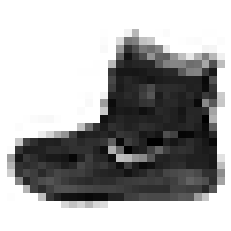

In [7]:
showImage(X_train[0])

In [8]:
  y_train[0]

9

# Feature Scale the Dataset

In [9]:
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train [shuffle_index], y_train [shuffle_index]

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Train Various Models on the Dataset

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Logistic Regression (Softmax Regression)

In [12]:
from sklearn.linear_model import LogisticRegression

# using Softmax Regression (multi-class classification problem)

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10 , random_state=42)

In [13]:
log_clf.fit(X_train_scaled, y_train)

#Making prediction on an instance from training dataset
y_train_predict = log_clf.predict(X_train[0].reshape(1, -1))


Actual Label: 8
Predicted Label: 8


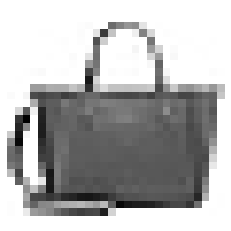

In [14]:
print("Actual Label:", y_train[0])
print("Predicted Label:" ,y_train_predict[0])
showImage(X_train[0])

In [15]:
y_train_predict = log_clf.predict(X_train_scaled)

In [16]:
log_accuracy = accuracy_score (y_train, y_train_predict)
print("Accuracy:", log_accuracy)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
print("Precision:", log_precision)
log_recall = recall_score(y_train, y_train_predict, average='weighted')
print("Recall:", log_recall)
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')
print("f1_score:", log_f1_score)

Accuracy: 0.8775333333333334
Precision: 0.876648632278309
Recall: 0.8775333333333334
f1_score: 0.8769281105807729


## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=15, random_state=42)

# Scaling is not needed for Decision Tree based algorithms like Random Forest and XGBoost

rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
#Making prediction on an instance from training dataset
y_train_predict2 = rnd_clf.predict(X_train[0].reshape(1, -1))

Actual Label: 8
Predicted Label: 8


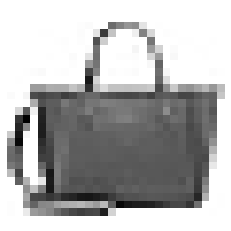

In [20]:
print("Actual Label:", y_train[0])
print("Predicted Label:" ,y_train_predict2[0])
showImage(X_train[0])

In [21]:
y_train_predict2 = rnd_clf.predict(X_train)

In [22]:
rnd_accuracy = accuracy_score (y_train, y_train_predict2)
print("Accuracy:", rnd_accuracy)
rnd_precision = precision_score(y_train, y_train_predict2, average='weighted')
print("Precision:", rnd_precision)
rnd_recall = recall_score(y_train, y_train_predict2, average='weighted')
print("Recall:", rnd_recall)
rnd_f1_score = f1_score(y_train, y_train_predict2, average='weighted')
print("f1_score:", rnd_f1_score)

Accuracy: 0.9623
Precision: 0.9628923230416621
Recall: 0.9623
f1_score: 0.9621623466146279


# Select the Model

## Cross-Validation - Softmax Regression

In [23]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

In [24]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std()) 

In [25]:
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10 , random_state=42)
log_cv_scores = cross_val_score(log_clf, X_train_scaled, y_train, cv=3, scoring = "accuracy") 
display_scores(log_cv_scores)

Scores: [0.84905 0.84825 0.84395]
Mean: 0.8470833333333333
Standard deviation: 0.0022395436042987695


In [26]:
log_cv_accuracy = log_cv_scores.mean()
print("Accuracy:", log_cv_accuracy)
y_train_pred = cross_val_predict(log_clf,X_train_scaled, y_train, cv=3)
confusion_matrix(y_train,y_train_pred)
log_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
print("Precision:", log_cv_precision)
log_cv_recall = recall_score(y_train,y_train_pred , average='weighted')
print("Recall:", log_cv_recall)
log_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", log_cv_f1_score)

Accuracy: 0.8470833333333333
Precision: 0.8458694883855286
Recall: 0.8470833333333333
f1_score: 0.846272242627941


## Cross-Validation - RandomForestClassifier

In [28]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10 ,random_state=42)

In [29]:
rnd_cv_scores = cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring = "accuracy") 
display_scores(rnd_cv_scores)
rnd_cv_accuracy = rnd_cv_scores.mean()
print("Accuracy:", rnd_cv_accuracy)
y_train_pred = cross_val_predict(rnd_clf,X_train, y_train, cv=3)
confusion_matrix(y_train,y_train_pred)
rnd_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
print("Precision:", rnd_cv_precision)
rnd_cv_recall = recall_score(y_train,y_train_pred , average='weighted')
print("Recall:", rnd_cv_recall)
rnd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')
print("f1_score:", rnd_cv_f1_score)

Scores: [0.85155 0.84745 0.84585]
Mean: 0.8482833333333334
Standard deviation: 0.002400462918318523
Accuracy: 0.8482833333333334
Precision: 0.8482875291253137
Recall: 0.8482833333333333
f1_score: 0.8452574403288833


# Fine Tune the Model

## Dimensionality Reduction

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=0.99)

In [45]:
X_train_reduced = pca.fit_transform(X_train)
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))
X_train_recovered  = pca.inverse_transform(X_train_reduced)

459
0.9900347820630976


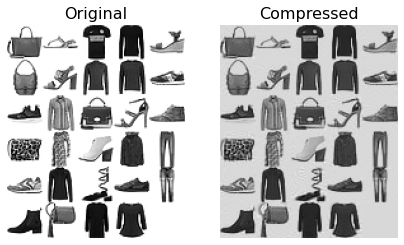

In [46]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

## Grid Search using the dimensionally reduced training dataset

In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = [
    {
        "lr__multi_class":["multinomial"],
        "lr__solver":["lbfgs"],
        "lr__C":[5],
        "rf__n_estimators":[20],
        "rf__max_depth":[10,15],
    }]

In [57]:
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10 , random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10 ,random_state=42)

In [58]:
voting_clf_grid_search = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

In [60]:
grid_search = GridSearchCV(voting_clf_grid_search, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=VotingClassifier(estimators=[('lr',
                                                     LogisticRegression(C=10,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='multinomial',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                        

In [61]:
grid_search.best_params_

{'lr__C': 5,
 'lr__multi_class': 'multinomial',
 'lr__solver': 'lbfgs',
 'rf__max_depth': 15,
 'rf__n_estimators': 20}

In [63]:
grid_search.best_estimator_

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=5, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                          

In [64]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.380380382358428 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 10, 'rf__n_estimators': 20}
1.3714651532819442 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}


# Evaluating Final Model on Test Dataset

In [75]:
final_model = grid_search.best_estimator_

In [76]:
X_test_reduced = pca.transform(X_test)

In [77]:
y_test_predict = final_model.predict(X_test_reduced)

In [78]:
confusion_matrix(y_test, y_test_predict)

array([[828,   3,  15,  45,   4,   3,  88,   1,  13,   0],
       [  4, 957,   5,  25,   5,   0,   4,   0,   0,   0],
       [ 20,   3, 742,  12, 125,   3,  82,   2,  11,   0],
       [ 31,   9,  17, 879,  26,   1,  32,   0,   5,   0],
       [  0,   1, 106,  38, 771,   3,  73,   1,   7,   0],
       [  0,   0,   0,   1,   0, 925,   0,  47,   6,  21],
       [156,   2, 125,  39,  96,   2, 553,   0,  27,   0],
       [  0,   0,   0,   0,   0,  32,   0, 933,   0,  35],
       [  4,   1,   2,  11,   4,   6,  15,   7, 947,   3],
       [  0,   0,   0,   0,   0,  14,   0,  42,   2, 942]])

In [79]:
final_accuracy = accuracy_score (y_test, y_test_predict)
print("Accuracy:", final_accuracy)
final_precision = precision_score(y_test, y_test_predict, average='weighted')
print("Precision:", final_precision)
final_recall = recall_score(y_test, y_test_predict, average='weighted')
print("Recall:", final_recall)
final_f1_score = f1_score(y_test, y_test_predict, average='weighted')
print("f1_score:", final_f1_score)

Accuracy: 0.8477
Precision: 0.8455248386644493
Recall: 0.8477
f1_score: 0.8460425762332676


Actual Label: 9
Predicted Label: 9


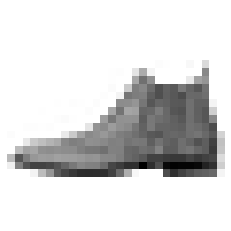

In [81]:
print("Actual Label:", y_test[0])
print("Predicted Label:" ,y_test_predict[0])
showImage(X_test[0])